# Lab 8: Define and Solve an ML Problem of Your Choosing

In [65]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [66]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv(adultDataSet_filename, header=0)# YOUR CODE HERE

df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Non-Female,2174,0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,0,0,13.0,United-States,<=50K
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Non-Female,0,0,40.0,United-States,<=50K
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Non-Female,0,0,40.0,United-States,<=50K
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K


## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

<Double click this Markdown cell to make it editable, and record your answers here.>

The data set I have chosen is censusData.csv.

I will be predicting whether an individual's income exceeds $50,000 per year. The label would be 'income_binary'.

This is a supervised learning problem because the label is known. This is a classification problem because a discrete category is being predicted rather than a continuous value. This problem is specifically a binary classification problem because the label has two possible outcomes: 1 (income > 50,000) and 0 (income <= 50,000).

The features before feature engineering are 'age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex_selfID','capital-gain', 'capital-loss', 'hours-per-week', 'native-country'.

A model that predicts whether someone's income exceeds a certain amount is valuable to a company in many ways. Companies can use these predictions to make informed decisions on their products and increase profits as well as customer satisfaction. One useful application of this model is in marketing. Companies can use this model to identify high-income individuals who are more likely to afford and buy premium products. This enables more efficient allocation of marketing resources. Another application is in pricing strategy. Companies can use this model to offer discounts or premium pricing based on predicted income levels. Optimized pricing can increase sales and profitability.

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

### Inspect Data

In [67]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex_selfID',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income_binary'],
      dtype='object')

In [68]:
df.shape

(32561, 15)

In [69]:
df.dtypes

age               float64
workclass          object
fnlwgt              int64
education          object
education-num       int64
marital-status     object
occupation         object
relationship       object
race               object
sex_selfID         object
capital-gain        int64
capital-loss        int64
hours-per-week    float64
native-country     object
income_binary      object
dtype: object

### Manage missing values in data

In [70]:
# YOUR CODE HERE
nan_count = np.sum(df.isnull(), axis=0)
nan_count

age                162
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex_selfID           0
capital-gain         0
capital-loss         0
hours-per-week     325
native-country     583
income_binary        0
dtype: int64

In [71]:
condition = nan_count != 0
col_names = nan_count[condition].index
nan_cols = list(col_names)

nan_cols

['age', 'workclass', 'occupation', 'hours-per-week', 'native-country']

In [72]:
nan_col_types = df[nan_cols].dtypes
nan_col_types

age               float64
workclass          object
occupation         object
hours-per-week    float64
native-country     object
dtype: object

#### Fill missing values for float type columns

Calculate the mean value of 'age' column and store it in a variable called 'mean_ages'. Then, fill in missing values with 'mean_ages'. Repeat this process for the 'hours-per-week' column.

In [73]:
mean_ages = df['age'].mean()
df['age'].fillna(value=mean_ages, inplace=True)
mean_hours = df['hours-per-week'].mean()
df['hours-per-week'].fillna(value=mean_hours, inplace=True)

In [74]:
print(np.sum(df['hours-per-week'].isnull(), axis=0))
print(np.sum(df['age'].isnull(), axis=0))

0
0


#### Fill missing values for object type columns

Fill in missing values of 'Object' type columns with 'Unknown'.

In [75]:
df['workclass'].fillna('Unknown', inplace=True)
df['occupation'].fillna('Unknown', inplace=True)
df['native-country'].fillna('Unknown', inplace=True)

#### Verify there are no missing values

In [76]:
np.sum(df.isnull(), axis=0)

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex_selfID        0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income_binary     0
dtype: int64

### Convert 'income_binary' values

Convert 'income_binary' values from Object type to integer type. If the value of 'income_binary' is >50k, convert the value to a 1. Otherwise, convert the value to a 0.

In [77]:
df['income_binary'].unique()

array(['<=50K', '>50K'], dtype=object)

In [78]:
df['income_binary'] = np.where(df['income_binary'] == '>50K', 1, 0)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Non-Female,2174,0,40.0,United-States,0
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,0,0,13.0,United-States,0
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Non-Female,0,0,40.0,United-States,0
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Non-Female,0,0,40.0,United-States,0
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,0


In [79]:
df['income_binary'].unique()

array([0, 1])

### Give unique integer values to Object type columns

Give each unique Object in a column its own integer value.

In [80]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['native-country'] = label_encoder.fit_transform(df['native-country'])
df['occupation'] = label_encoder.fit_transform(df['occupation'])
df['education'] = label_encoder.fit_transform(df['education'])

### Perform one-hot encoding on remaining Object type columns

In [81]:
df = pd.get_dummies(df, columns=['workclass', 'sex_selfID', 'race', 'marital-status', 'relationship'])

### Find correlations between features and label

In [82]:
corrs = df.corr()['income_binary'].drop('income_binary', axis=0)
corrs_sorted = corrs.sort_values(ascending=False)
corrs_sorted

marital-status_Married-civ-spouse       0.444696
relationship_Husband                    0.401035
capital-gain                            0.347555
education-num                           0.335154
age                                     0.233097
hours-per-week                          0.228397
sex_selfID_Non-Female                   0.215980
capital-loss                            0.150526
workclass_Self-emp-inc                  0.139467
relationship_Wife                       0.123264
race_White                              0.085224
education                               0.079317
workclass_Federal-gov                   0.059372
workclass_Local-gov                     0.033091
workclass_Self-emp-not-inc              0.030019
native-country                          0.022990
workclass_State-gov                     0.014843
marital-status_Married-AF-spouse        0.012061
occupation                              0.010802
race_Asian-Pac-Islander                 0.010543
workclass_Never-work

#### Drop columns with a negative correlation

In [83]:
df_corrs = pd.DataFrame(list(corrs_sorted.items()), columns=['column', 'correlation'])
exclude = df_corrs[df_corrs['correlation'] < 0]['column'].tolist()
df = df.drop(columns=exclude, axis=1)
df.shape

(32561, 21)

### Inspect data with new features

In [84]:
df.head()

,age,education,education-num,occupation,capital-gain,capital-loss,hours-per-week,native-country,income_binary,workclass_Federal-gov,...,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,sex_selfID_Non-Female,race_Asian-Pac-Islander,race_White,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,relationship_Husband,relationship_Wife
0,39.0,9,13,0,2174,0,40.0,38,0,0,...,0,0,1,1,0,1,0,0,0,0
1,50.0,9,13,3,0,0,13.0,38,0,0,...,0,1,0,1,0,1,0,1,1,0
2,38.0,11,9,5,0,0,40.0,38,0,0,...,0,0,0,1,0,1,0,0,0,0
3,53.0,1,7,5,0,0,40.0,38,0,0,...,0,0,0,1,0,0,0,1,1,0
4,28.0,9,13,9,0,0,40.0,4,0,0,...,0,0,0,0,0,0,0,1,0,1


In [85]:
df.columns

Index(['age', 'education', 'education-num', 'occupation', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'income_binary',
       'workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc',
       'workclass_State-gov', 'sex_selfID_Non-Female',
       'race_Asian-Pac-Islander', 'race_White',
       'marital-status_Married-AF-spouse', 'marital-status_Married-civ-spouse',
       'relationship_Husband', 'relationship_Wife'],
      dtype='object')

In [86]:
df.shape

(32561, 21)

## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

<Double click this Markdown cell to make it editable, and record your answers here.>

I have a new feature list that includes 20 features instead of 14. I first started by checking which features had missing values and filled them in accordingly. Then, I transformed several columns so that they were no longer Object types. This involved one-hot encoding the 'marital-status', 'workclass', 'sex_selfID', 'race', and 'relationship' columns. I also gave each country in 'native-country' a unique number value, as there were too many countries to perform one-hot encoding on this column. I performed the same operation on the 'education' and 'occupation' columns. Finally, I removed any features with negative correlation to the label, as these features wouldn't be useful for the final result and make runtime slower.

I will first split the data into features (X) and the label (y). Then I will split these into training and test sets. Then, I will scale the data. This is to standardize features by removing the mean and scaling to unit variance.

I will be training a Logistic Regression model, as it is easy to interpret and computationally efficient for smaller datasets.

My plan is to first train a Logistic Regression model with the default parameters. Then, I will use GridSearchCV to tune the 'C' hyperparameter with cross-validation. I will use this value to make a model with the best 'C' value. I will then evaluate the model using accuracy, precision, recall, and ROC-AUC score on the validation set. If this model performs poorly, I will train another model and compare their performances.

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [87]:
# YOUR CODE HERE
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_curve

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

### Create labeled examples from data

Assign the features to 'X' and the label to 'y'

In [88]:
# YOUR CODE HERE
y = df['income_binary']
X = df.drop('income_binary', axis=1)

### Create training and test sets

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

### Standardize the features

In [90]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Training the model

Create a default model. By default, C=1 and max_iter=100

In [91]:
model_default = LogisticRegression()
model_default.fit(X_train_scaled, y_train)

LogisticRegression()

#### Test model on test data

Use the predict_proba() method to use the fitted model to predict class probabilities for the test set.

Use the predict() method to use the fitted model model_default to predict the class labels for the test set.

In [92]:
proba_predictions_default = model_default.predict_proba(X_test_scaled)[:,1]
class_label_predictions_default = model_default.predict(X_test_scaled)

#### Print accuracy score

In [93]:
acc_score_default = accuracy_score(y_test, class_label_predictions_default)
acc_score_default

0.8423153692614771

## Perform model selection

Find the best choice of hyperparameteres 'C' and 'max_grid'

In [94]:
cs = [10**i for i in range(-5,5)]
max_iters = [100*i for i in range(1,11)]
param_grid={
    'C': cs,
    'max_iter': max_iters
}
param_grid

{'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000],
 'max_iter': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]}

### Perform Grid Search Cross-Validation

In [95]:
model = LogisticRegression()
grid = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search = grid.fit(X_train_scaled, y_train)
print('Done')

Done


In [96]:
best_c = grid_search.best_estimator_.C
best_c

0.1

In [97]:
best_max_iter = grid_search.best_estimator_.max_iter
best_max_iter

100

## Train, test, and evaluate best model

In [98]:
model_best = LogisticRegression(C=best_c, max_iter=best_max_iter)
model_best.fit(X_train_scaled, y_train)

LogisticRegression(C=0.1)

In [99]:
proba_predictions_best = model_best.predict_proba(X_test_scaled)[:,1]
class_label_predictions_best = model_best.predict(X_test_scaled)

In [100]:
c_m = confusion_matrix(y_test, class_label_predictions_default, labels=[True, False])
print('Matrix with default C:\n', c_m)
c_m_best = confusion_matrix(y_test, class_label_predictions_best, labels=[True, False])
print('Matrix with best C:\n', c_m_best)

Matrix with default C:
 [[ 842  686]
 [ 341 4644]]
Matrix with best C:
 [[ 841  687]
 [ 341 4644]]


In [101]:
acc_score_best = accuracy_score(y_test, class_label_predictions_best)
acc_score_best

0.8421618301857823

## Plot precision-recall curves

In [102]:
precision_default, recall_default, thresholds_default = precision_recall_curve(y_test, proba_predictions_default)
precision_best, recall_best, thresholds_best = precision_recall_curve(y_test, proba_predictions_best)

<AxesSubplot: >

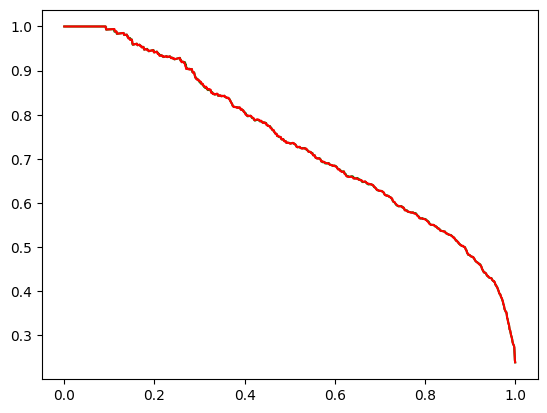

In [103]:
sns.lineplot(x=recall_default, y=precision_default, color='green')
sns.lineplot(x=recall_best, y=precision_best, color='red')

## Plot ROC curves and calculate AUC

In [104]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [105]:
fpr_default, tpr_default, thresholds_default = roc_curve(y_test, proba_predictions_default)
fpr_best, tpr_best, thresholds_best = roc_curve(y_test, proba_predictions_best)

#### ROC Curve for Default Model

Text(0.5, 1.0, 'Receiver operating characteristic (ROC) curve')

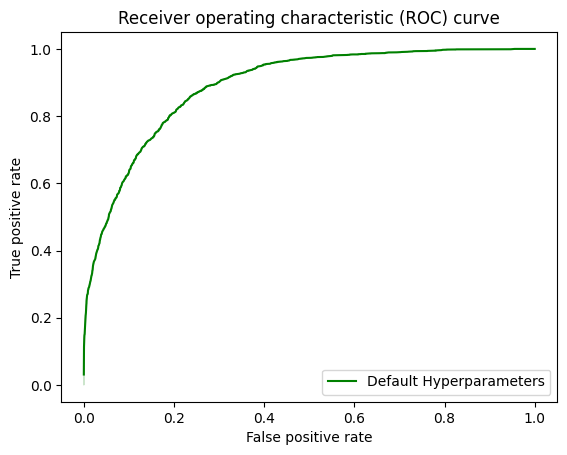

In [106]:
sns.lineplot(x=fpr_default, y=tpr_default, color="green", label='Default Hyperparameters')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver operating characteristic (ROC) curve')

#### ROC Curve for Best Model

Text(0.5, 1.0, 'Receiver operating characteristic (ROC) curve')

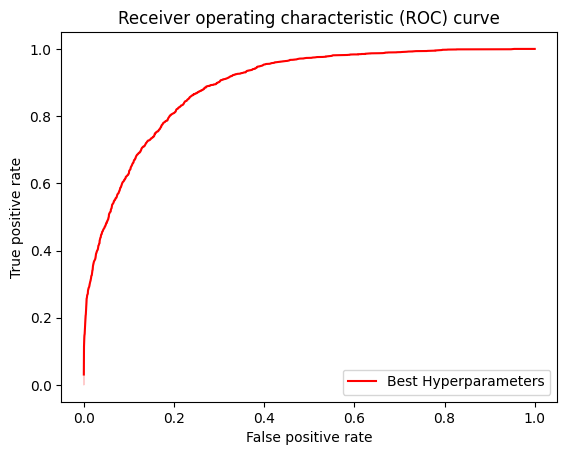

In [107]:
sns.lineplot(x=fpr_best, y=tpr_best, color="red", label='Best Hyperparameters')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver operating characteristic (ROC) curve')

#### Calculate AUC

In [108]:
auc_default = auc(fpr_default, tpr_default)
auc_best = auc(fpr_best, tpr_best)

print('AUC Default:', auc_default)
print('AUC Best:', auc_best)

AUC Default: 0.8910931748123953
AUC Best: 0.8910845100747269


## Analysis Pt. 1

The Logistic Regression model was a good starting point. While finding the best hyperparameters for the model had little impact on accuracy, both AUC and accuracy is high without overfitting. However, I decided to train and test a different model to see if I could improve the accuracy and AUC.

I chose to train a Gradient Boosting Classifier because the model would be better at handling non-linear problems. Gradient Boosting models also generalize better on complex datasets by reducing variance and overfitting through regularization technqiues.

I will first train a model with the default hyperparameters. I will then find the best hyperparameters and train a new model based on the results. The hyperparameters I will be tuning are 'max_depth' and 'min_samples_leaf'. Then, I will evaluate the results using a precision-recall curve and a ROC-curve.

## Train, test, and evaluate a Gradient Boosting Classifier

In [109]:
from sklearn.ensemble import GradientBoostingClassifier

#### Train and test a model with default hyperparameters

In [110]:
gb_model_default = GradientBoostingClassifier()
gb_model_default.fit(X_train_scaled, y_train)

GradientBoostingClassifier()

In [111]:
gb_class_label_predictions_default = gb_model_default.predict(X_test_scaled)
gb_predict_proba_default = gb_model_default.predict_proba(X_test_scaled)[:,1]

In [112]:
gb_acc_score = accuracy_score(y_test, gb_class_label_predictions_default)
gb_acc_score

0.8624289881774911

#### Find the best hyperparameters for the model

I chose to test different values for 'min_samples_leaf' and 'max_depth'

In [113]:
gb_param_grid = {
    'min_samples_leaf': [2**i for i in range(5)],
    'max_depth': [3, 5, 7, 9, 11]
}
gb_param_grid

{'min_samples_leaf': [1, 2, 4, 8, 16], 'max_depth': [3, 5, 7, 9, 11]}

In [114]:
gb_model = GradientBoostingClassifier()
grid_search_gb = GridSearchCV(gb_model, gb_param_grid, cv=5, scoring='accuracy')
grid_search_gb.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': [3, 5, 7, 9, 11],
                         'min_samples_leaf': [1, 2, 4, 8, 16]},
             scoring='accuracy')

#### Print best hyperparameters

In [115]:
best_msl = grid_search_gb.best_estimator_.min_samples_leaf
best_msl

4

In [116]:
best_md = grid_search_gb.best_estimator_.max_depth
best_md

7

#### Train and test a model using best hyperparameters

In [117]:
gb_model_best = GradientBoostingClassifier(max_depth=best_md, min_samples_leaf=best_msl)
gb_model_best.fit(X_train_scaled, y_train)

GradientBoostingClassifier(max_depth=7, min_samples_leaf=4)

In [118]:
gb_class_label_predictions_best = gb_model_best.predict(X_test_scaled)
gb_predict_proba_best = gb_model_best.predict_proba(X_test_scaled)[:,1]

In [119]:
gb_acc_score_best = accuracy_score(y_test, gb_class_label_predictions_best)
gb_acc_score_best

0.8704130201136189

### Plot precision-recall curve

In [120]:
precision_default, recall_default, thresholds_default = precision_recall_curve(y_test, gb_predict_proba_default)
precision_best, recall_best, thresholds_best = precision_recall_curve(y_test, gb_predict_proba_best)

<AxesSubplot: >

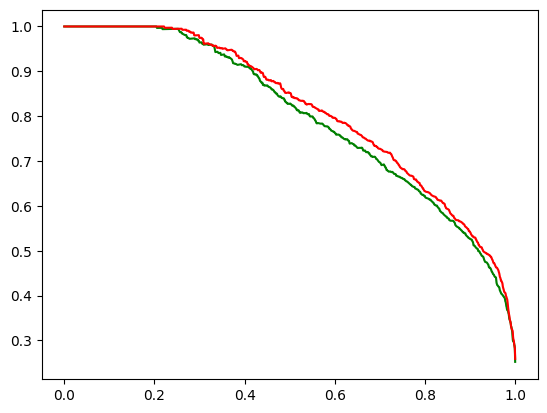

In [121]:
sns.lineplot(x=recall_default, y=precision_default, color='green')
sns.lineplot(x=recall_best, y=precision_best, color='red')

### Plot ROC curve and calculate AUC

In [123]:
fpr_default, tpr_default, thresholds_default = roc_curve(y_test, gb_predict_proba_default)
fpr_best, tpr_best, thresholds_best = roc_curve(y_test, gb_predict_proba_best)

Text(0.5, 1.0, 'Receiver operating characteristic (ROC) curve')

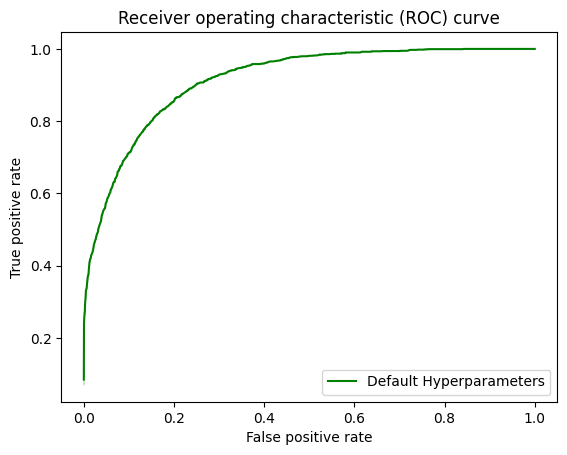

In [124]:
sns.lineplot(x=fpr_default, y=tpr_default, color="green", label='Default Hyperparameters')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver operating characteristic (ROC) curve')

Text(0.5, 1.0, 'Receiver operating characteristic (ROC) curve')

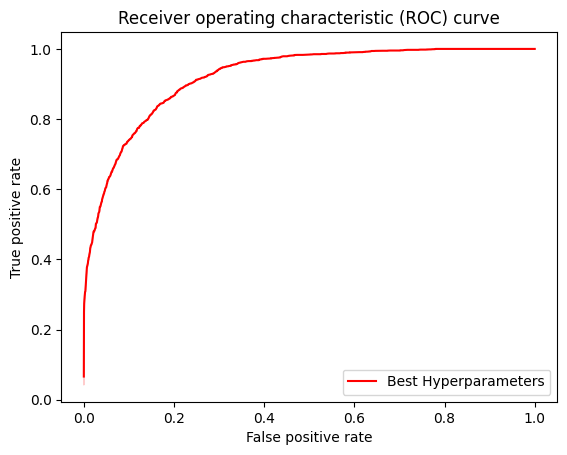

In [125]:
sns.lineplot(x=fpr_best, y=tpr_best, color="red", label='Best Hyperparameters')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver operating characteristic (ROC) curve')

In [126]:
gb_auc_default = auc(fpr_default, tpr_default)
gb_auc_best = auc(fpr_best, tpr_best)

print('AUC Default:', gb_auc_default)
print('AUC Best:', gb_auc_best)

AUC Default: 0.9142534934646872
AUC Best: 0.9218340886533947


## Comparison Graphs

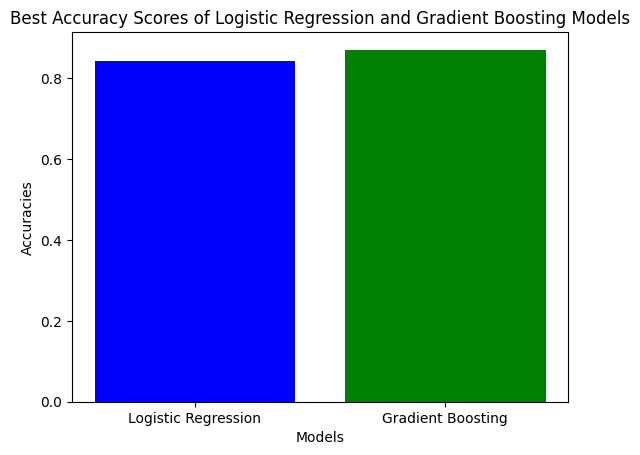

In [127]:
models = ['Logistic Regression', 'Gradient Boosting']
accuracies = [acc_score_best, gb_acc_score_best]

plt.figure()
plt.bar(models, accuracies, color=['blue', 'green'])
plt.xlabel('Models')
plt.ylabel('Accuracies')
plt.title('Best Accuracy Scores of Logistic Regression and Gradient Boosting Models')
plt.show()

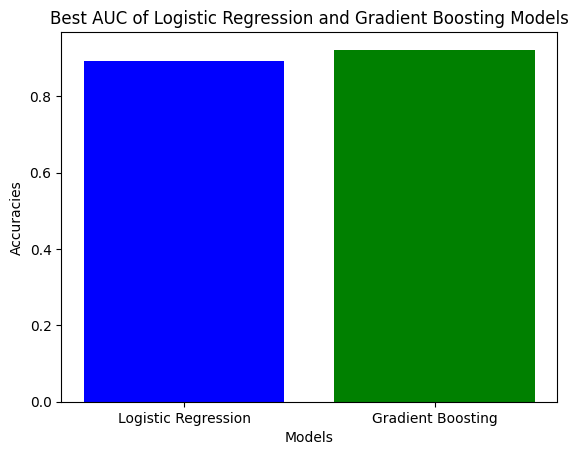

In [128]:
auc_scores = [auc_best, gb_auc_best]

plt.figure()
plt.bar(models, auc_scores, color=['blue', 'green'])
plt.xlabel('Models')
plt.ylabel('Accuracies')
plt.title('Best AUC of Logistic Regression and Gradient Boosting Models')
plt.show()

## Analysis Pt. 2

After using the Gradient Boosting model, both accuracy and AUC improved. This is most likely because the Gradient Boosting model was able to handle the non-linear relationships between the features and the label.

The Gradient Boosting model has an accuracy of about 0.87. This is a good accuracy, as the model is not underfitting nor overfitting. The AUC is 0.92, which is another indicator of the model performing well. Ensemble models like this generalize well to new data, so the model is performing as expected.

I originally planned on only testing different values for 'max_depth' and 'min_samples_leaf', but I also decided to test values for 'n_estimators' as well, as I thought a higher value would improve accuracy. However, I couldn't get a result even after a few minutes of waiting. While runtime before trying 'n_estimators' wasn't amazing, I was able to run everything within five minutes. Runtime is important because time is very valuable for companies, and a long runtime slows down production and hold up workflow. So while accuracy could possibly be improve this way, I decided to stick to the original plan of only performing cross-validation on the other two parameters.